In [83]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [102]:
Tickers = "ASST"
data = yf.download(Tickers, period='1y', progress=False)
returns = data["Close"].pct_change().dropna()
returns = pd.DataFrame(returns)
returns.head()

/var/folders/c3/_pvgw8912kqc3xvfwfgx0nlh0000gn/T/ipykernel_86524/3258551840.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(Tickers, period='1y', progress=False)


Ticker,ASST
Date,
2024-10-08,0.000000
2024-10-09,-0.071429
2024-10-10,0.019231
2024-10-11,-0.018868
2024-10-14,0.009615


Check if the data is up or down.

In [103]:
days_direction = returns > 0
days_direction

Ticker,ASST
Date,
2024-10-08,False
2024-10-09,False
2024-10-10,True
2024-10-11,False
2024-10-14,True
...,...
2025-10-01,True
2025-10-02,True
2025-10-03,False


In [104]:
theta_ml = days_direction.sum()/len(days_direction)
theta_ml

Ticker
ASST    0.416
dtype: float64

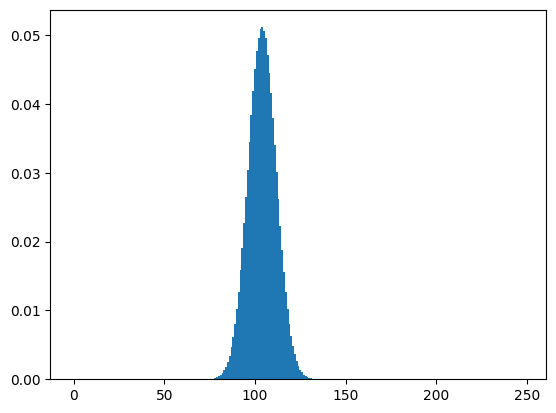

In [105]:
true_counts = np.random.binomial(n=250, p=theta_ml, size=5_000_000)
plt.hist(true_counts, bins=range(250), density=True, align="left")
plt.show()

# Bayesian vs. Frequentist Estimation
There are distint differences from frequentists/classical analysis and Bayesian data analysis. The main difference is how it treats model parameters. Both aim to learn more about parameters $\theta$. Where $\theta$ contains a fixed but unknown amount of elements that is associated with the population. 
## Bayesian 
- Formulate probabilistic statments about events before collecting additional data
- These subjective probabilities are called priors
- Assigns guess to $\theta$, and give it a prior probability distribution labeled $p(\theta)$
## Frequentist
- All estimations are based only on the observed data
- collects samples of observations and combine it with statistial models to produce an estimate $\hat{\theta}$
- uncertiainy comes from the fact that its a sample, and uncertainty is expressed by standard errors to each element of $\hat{\theta}$

There are frameworks to relate $\theta$ to the observed data $y$ and a matrix of explanatory variables $X$. This is formalized in the likelihood function
$$p(y\mid\theta , X)$$
